Date
2015-01-01    1405
2015-01-02    1109
2015-01-03    1240
2015-01-04    1317
2015-01-05    1320
2015-01-06    1308
2015-01-07    1368
2015-01-08    1372
2015-01-09    1491
2015-01-10    1388
2015-01-11    1451
2015-01-12    1526
2015-01-13    1441
2015-01-14    1404
2015-01-15    1377
2015-01-16    1395
2015-01-17    1369
2015-01-18    1371
2015-01-19    1412
2015-01-20    1347
Name: modal, dtype: int64


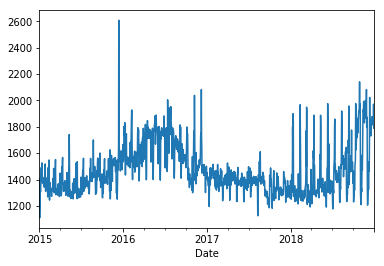

In [14]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv('bajri1.csv', header=0)
# display first few row
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [33]:
# split the dataset
from pandas import Series
series = Series.from_csv('bajri1.csv', header=0)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 1454, Validation 7


/home/rushikesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
/home/rushikesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [34]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [35]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [36]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1089
Model:                     ARMA(7, 1)   Log Likelihood               -6867.994
Method:                       css-mle   S.D. of innovations            132.492
Date:                Fri, 29 Mar 2019   AIC                          13755.987
Time:                        15:00:08   BIC                          13805.917
Sample:                             0   HQIC                         13774.886
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.7133    197.202      0.916      0.360    -205.795     567.222
ar.L1.y        1.6392      0.025     65.942      0.000       1.590       1.688
ar.L2.y       -0.5581      0.049    -11.491      0.0

In [30]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [20]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)

In [7]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(3,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 1805.920678


In [14]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [15]:
print(forecast)

[473.14195078]


In [36]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
from pandas import datetime

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# one-step out of sample forecast
start_index = 1
end_index = 1
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 1497.548931


In [37]:
print(len(differenced))

1089


In [38]:
print(X)

[1405 1109 1240 ... 1864 1814 1840]


In [39]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 1827.141951
Day 2: 1733.531386
Day 3: 1677.760766
Day 4: 1676.868738
Day 5: 1703.559941
Day 6: 1690.509769
Day 7: 1786.615937


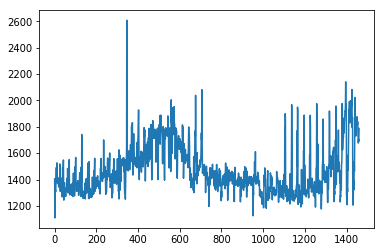

In [41]:
import matplotlib.pyplot as plt
plt.plot(history)
